## Assignment

- Use the same data you chose for the previous lesson, or get new data.
- Do train/test split. Report your mean absolute error on the train and test set, for these forecasts:
  - Mean Baseline
  - Naive Baseline (Last Observation)
  - Prophet forecast (you can choose the parameters or use the defaults)
- Do time series cross-validation, using these Prophet functions:
  - cross_validation
  - performance_metrics
  - plot_cross_validation_metric
- Commit your notebook to your fork of the GitHub repo.

### Stretch Challenges
- **Share your visualizations on Slack!**
- Use the Wikimedia Pageviews API to get data.
- [Get daily weather station data](https://www.ncdc.noaa.gov/cdo-web/search) from the NOAA (National Oceanic and Atmospheric Administration). User Prophet to forecast the weather for your local area. 
- Adjust your forecasts with Prophet's [changepoints](https://facebook.github.io/prophet/docs/trend_changepoints.html) and [holidays](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) options. In addition to Prophet's documentation, read Will Koehrsen's blog post, [Time Series Analysis in Python](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a). **How do these parameters affect your error metrics?**
- Learn more about how Prophet works. Read the [tweestorm with animated GIFs](https://twitter.com/seanjtaylor/status/1123278380369973248) by Prophet developer Sean J. Taylor, or his [research paper](https://peerj.com/preprints/3190/).

In [258]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [259]:
df = pd.read_csv('/Users/ridleyleisy/Documents/lambda/unit_two/DS-Unit-2-Regression-1/module2-evaluating-forecasts/walmart-recruiting-store-sales-forecasting/train.csv')

In [260]:
cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())

In [261]:
df['holiday'] = df['Date'].isin(holidays)

In [262]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,holiday
0,1,1,2010-02-05,24924.50,False,False
1,1,1,2010-02-12,46039.49,True,False
2,1,1,2010-02-19,41595.55,False,False
3,1,1,2010-02-26,19403.54,False,False
4,1,1,2010-03-05,21827.90,False,False


### Train/test split
Only looking at store 13

In [263]:
train['Store'].value_counts().head()

12    6764
Name: Store, dtype: int64

In [264]:
train = df.loc[(df['Date'] < '2012-01-01') & (df['Store'] == 12)].copy()
test = df.loc[(df['Date'] >= '2012-01-01')& (df['Store'] == 12)].copy()

In [265]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,holiday
107901,12,1,2010-02-05,17426.75,False,False
107902,12,1,2010-02-12,37734.82,True,False
107903,12,1,2010-02-19,22135.29,False,False
107904,12,1,2010-02-26,14942.21,False,False
107905,12,1,2010-03-05,17098.49,False,False


### Mean baseline

In [266]:
train['mean_baseline'] = train['Weekly_Sales'].mean()
test['mean_baseline'] = train['Weekly_Sales'].mean()

In [267]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,holiday,mean_baseline
107901,12,1,2010-02-05,17426.75,False,False,14924.953346
107902,12,1,2010-02-12,37734.82,True,False,14924.953346
107903,12,1,2010-02-19,22135.29,False,False,14924.953346
107904,12,1,2010-02-26,14942.21,False,False,14924.953346
107905,12,1,2010-03-05,17098.49,False,False,14924.953346
107906,12,1,2010-03-12,15535.51,False,False,14924.953346
107907,12,1,2010-03-19,15038.34,False,False,14924.953346
107908,12,1,2010-03-26,17477.41,False,False,14924.953346
107909,12,1,2010-04-02,43175.19,False,False,14924.953346
107910,12,1,2010-04-09,42083.31,False,False,14924.953346


### Naive baseline

In [268]:
train['naive_baseline'] = train['Weekly_Sales'].shift(1).bfill()

In [269]:
test['naive_baseline'] = train['Weekly_Sales'].iloc[-1]

In [270]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,holiday,mean_baseline,naive_baseline
107901,12,1,2010-02-05,17426.75,False,False,14924.953346,17426.75
107902,12,1,2010-02-12,37734.82,True,False,14924.953346,17426.75
107903,12,1,2010-02-19,22135.29,False,False,14924.953346,37734.82
107904,12,1,2010-02-26,14942.21,False,False,14924.953346,22135.29
107905,12,1,2010-03-05,17098.49,False,False,14924.953346,14942.21


## Errors

In [271]:
from sklearn.metrics import mean_absolute_error

In [272]:
cols = {'Date':'ds','Weekly_Sales':'y'}
test.rename(cols, axis=1, inplace=True)
train.rename(cols, axis=1, inplace=True)

In [273]:
mean_absolute_error(train['y'],train['mean_baseline'])

12975.019421102534

In [274]:
mean_absolute_error(train['y'],train['naive_baseline'])

2256.2450384387935

In [275]:
mean_absolute_error(test['y'],test['mean_baseline'])

13013.57474281858

In [276]:
mean_absolute_error(test['y'],test['naive_baseline'])

14411.85343420605

## Prophet

In [282]:
cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())

In [286]:
train[train['ds'].isin(holidays)]

,Store,Dept,ds,y,IsHoliday,holiday,mean_baseline,naive_baseline


In [279]:
holidays = train[['ds','holiday']]

In [280]:
from fbprophet import Prophet

In [287]:
m = Prophet()

In [288]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [301]:
train.loc[train['ds'] > '2010-11-01'].head()

,Store,Dept,ds,y,IsHoliday,holiday,mean_baseline,naive_baseline
107940,12,1,2010-11-05,36945.66,False,False,14924.953346,32760.45
107941,12,1,2010-11-12,11608.18,False,False,14924.953346,36945.66
107942,12,1,2010-11-19,12815.09,False,False,14924.953346,11608.18
107943,12,1,2010-11-26,14004.02,True,False,14924.953346,12815.09
107944,12,1,2010-12-03,18754.63,False,False,14924.953346,14004.02


In [290]:
future = m.make_future_dataframe(periods=52,freq='W')

In [291]:
preds_train = m.predict(train)
preds_test = m.predict(test)

In [292]:
preds_train.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,14957.242433,-7040.579741,39125.722717,14957.242433,14957.242433,0.0,0.0,0.0,0.0,0.0,0.0,14957.242433
1,2010-02-05,14957.242433,-10628.887428,37264.569891,14957.242433,14957.242433,0.0,0.0,0.0,0.0,0.0,0.0,14957.242433
2,2010-02-05,14957.242433,-7145.251508,38151.638930,14957.242433,14957.242433,0.0,0.0,0.0,0.0,0.0,0.0,14957.242433
3,2010-02-05,14957.242433,-9627.278140,36627.574328,14957.242433,14957.242433,0.0,0.0,0.0,0.0,0.0,0.0,14957.242433
4,2010-02-05,14957.242433,-8764.911606,38552.450636,14957.242433,14957.242433,0.0,0.0,0.0,0.0,0.0,0.0,14957.242433


In [293]:
mean_absolute_error(train['y'],preds_train['yhat'])

13045.930291767661

In [294]:
mean_absolute_error(test['y'],preds_test['yhat'])

16879.801801807364

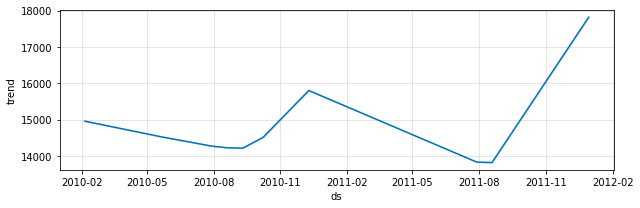

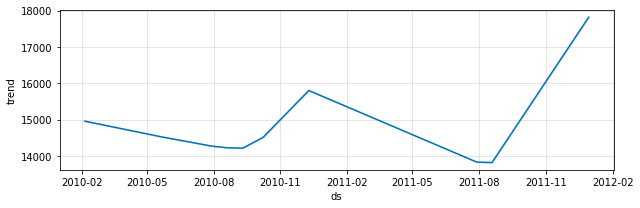

In [295]:
m.plot_components(preds_train)

## Cross Val

In [296]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [297]:
df_cv = cross_validation(m, horizon='500 days', initial='180 days',period='90 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2010-08-17 00:00:00 and 2010-08-17 00:00:00
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [298]:
performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,52 days,2.481398e+08,15752.453393,11816.760780,0.870529
1,59 days,2.370256e+08,15395.634155,11589.749733,0.875594
2,66 days,2.193667e+08,14811.032049,11285.393810,0.882467
3,73 days,2.167117e+08,14721.132504,11239.857805,0.879085
4,80 days,2.179412e+08,14762.830946,11296.420038,0.875161
5,87 days,2.202005e+08,14839.155215,11342.559271,0.872670
6,94 days,2.203732e+08,14844.973629,11366.240294,0.870744
7,101 days,5.002342e+08,22365.915149,12569.744367,0.858700
8,108 days,5.152362e+08,22698.815331,12867.879760,0.850520
9,115 days,5.394275e+08,23225.579646,13233.806247,0.840444


In [299]:
from fbprophet.plot import plot_cross_validation_metric

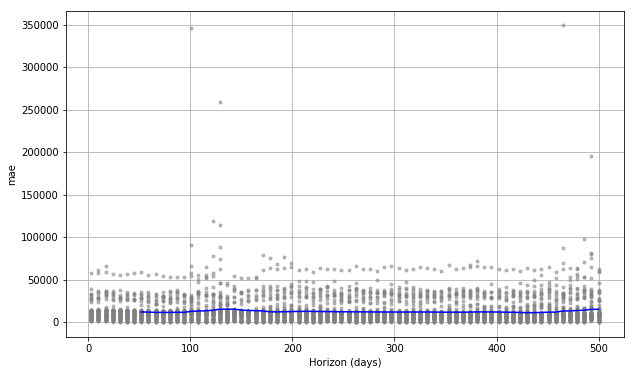

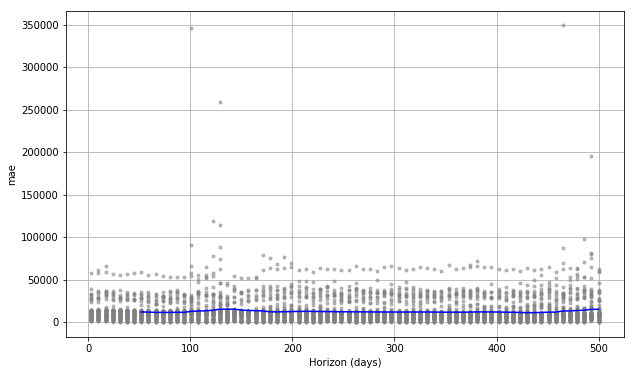

In [300]:
plot_cross_validation_metric(df_cv, 'mae')